In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [147]:
#Read input file and understand the data
# "default" is my dependent variable
gcreditdf = pd.read_csv("german_credit.csv")
gcreditdf.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [148]:
print(gcreditdf.ndim)
print(gcreditdf.shape)# Print Shape of model data

2
(1000, 21)


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [171]:
gcreditdf1 = pd.get_dummies(gcreditdf,drop_first = 1)

In [172]:
gcreditdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

In [173]:
gcreditdf1.head(2)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1


In [174]:
gcreditdf2 = pd.concat([gcreditdf,gcreditdf1],axis = 1)

In [175]:
gcreditdf2.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,6,1169,4,4,67,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,1,48,5951,2,2,22,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

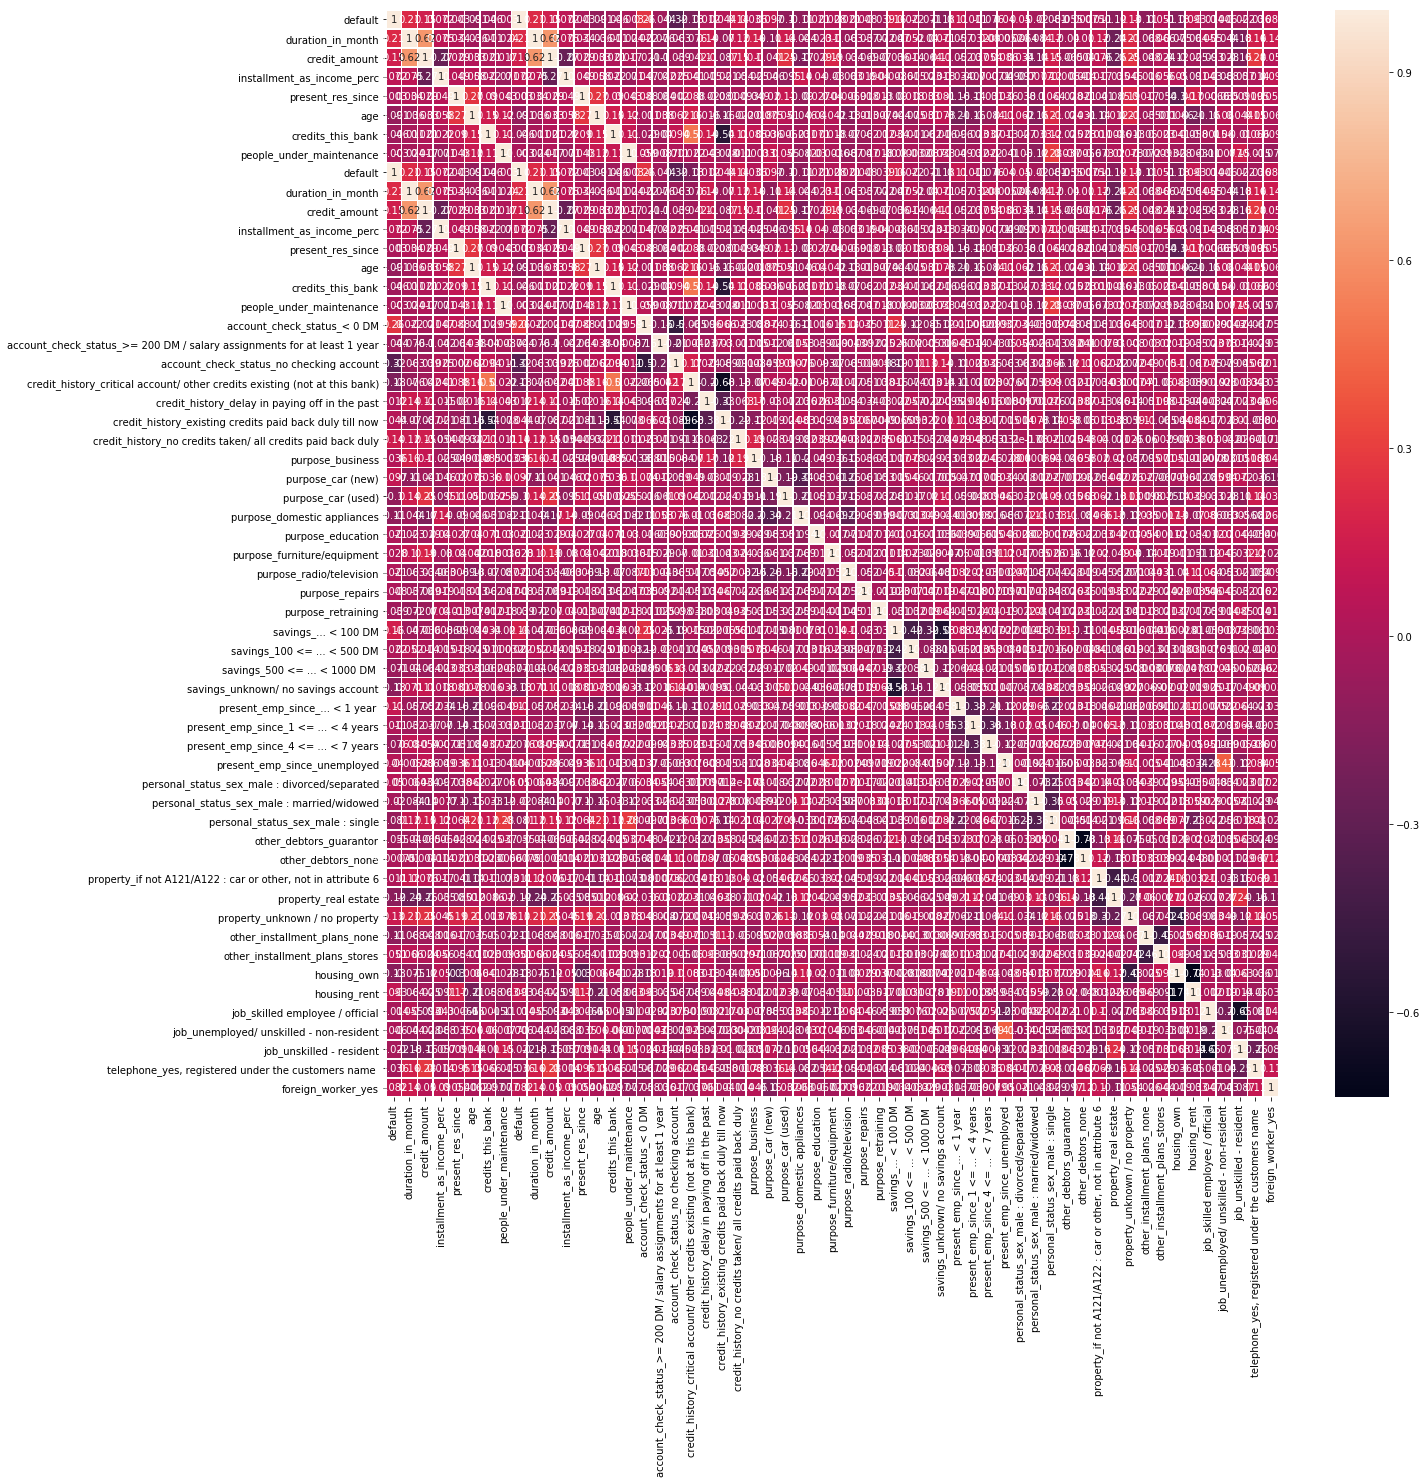

In [176]:
plt.figure(figsize=(20,20))       
sns.heatmap(gcreditdf2.corr(), annot= True, linewidths=.5)
plt.show()

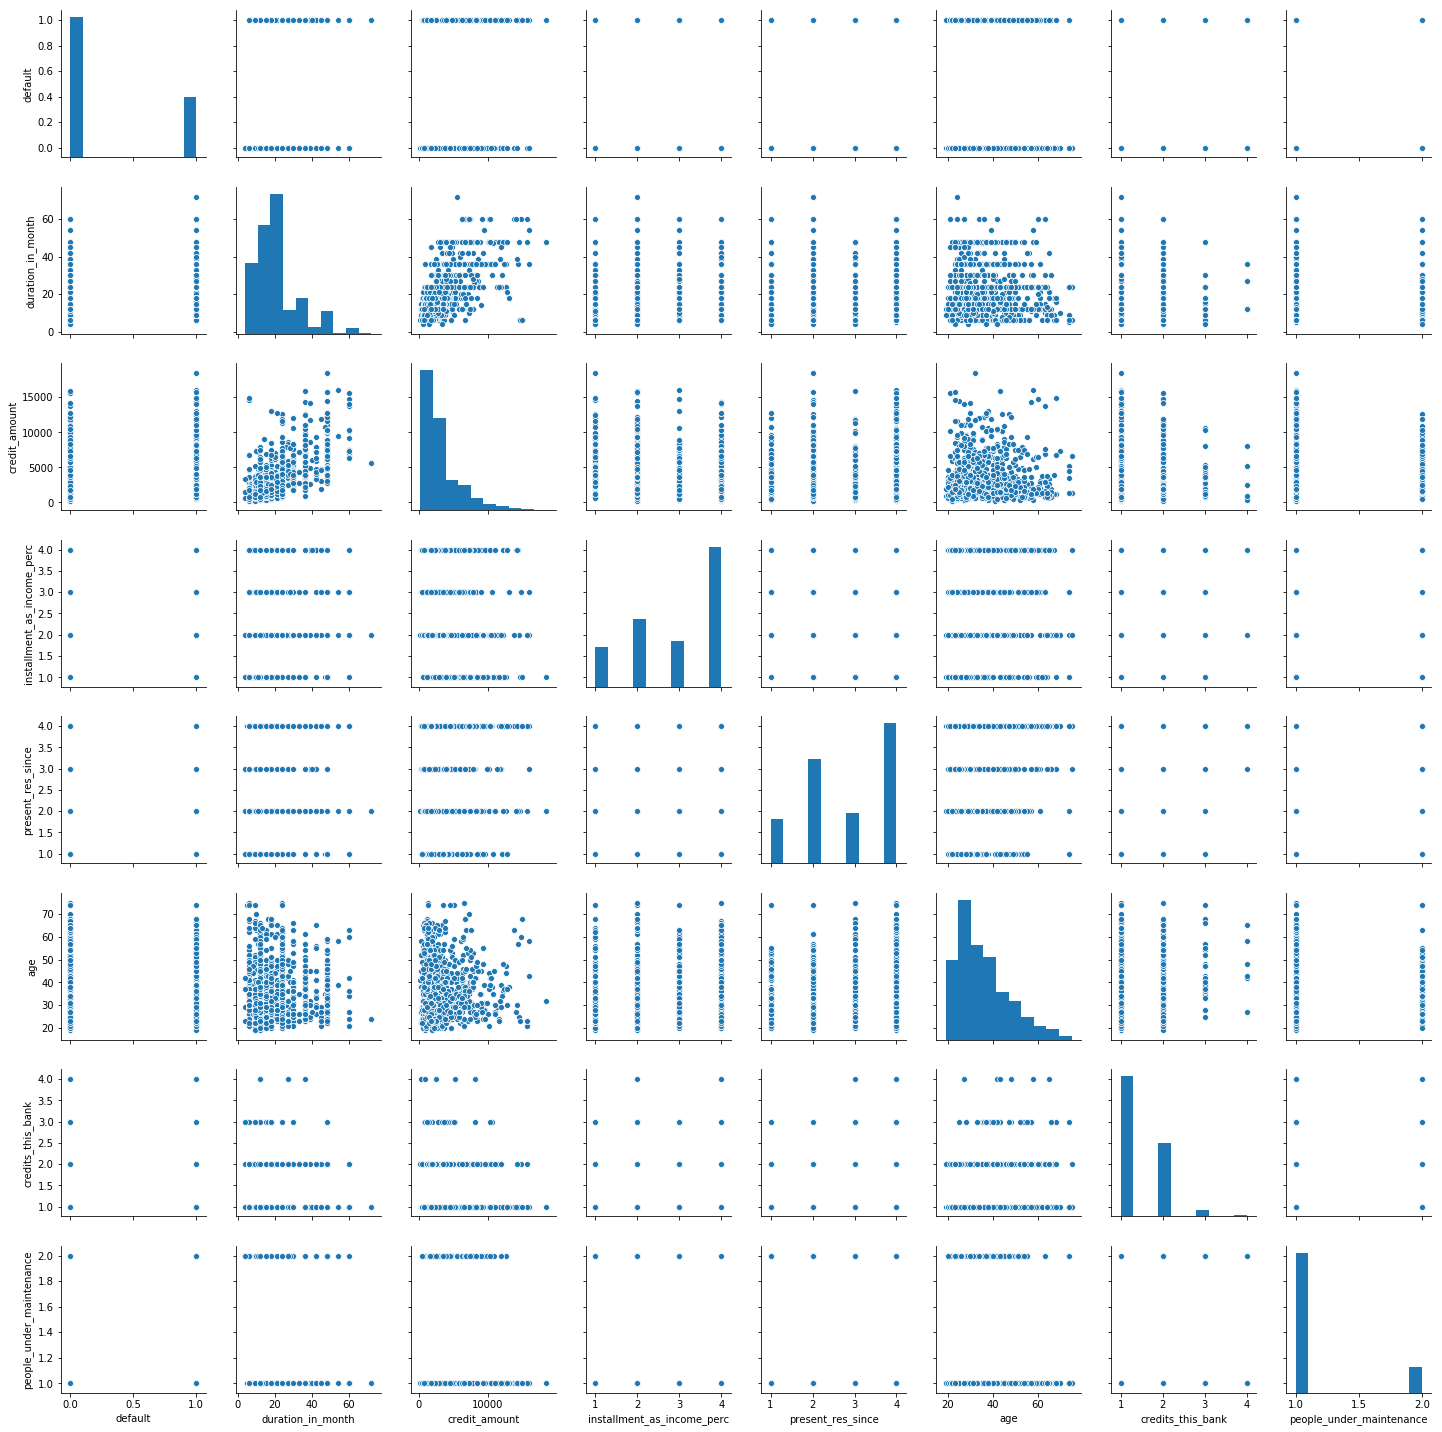

In [161]:
sns.pairplot(gcreditdf)

### Drop the original variables which are converted to dummy

In [177]:
gcreditdf2.drop(['account_check_status','credit_history','purpose','present_emp_since', \
                'savings','housing','personal_status_sex','other_debtors','other_installment_plans', \
                'property','job','telephone','foreign_worker'],axis = 1,inplace = True)

In [178]:
gcreditdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 57 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
default                                                                       1000 non-null int64
duration_in_

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [179]:
X = gcreditdf2.iloc[:,1:]
y = gcreditdf2.iloc[:,0:1]

In [180]:
print(X.head(2))
print(y.head(2))

   duration_in_month  credit_amount  installment_as_income_perc  present_res_since  age  credits_this_bank  people_under_maintenance  default  duration_in_month  credit_amount  installment_as_income_perc  present_res_since  age  credits_this_bank  people_under_maintenance  account_check_status_< 0 DM  account_check_status_>= 200 DM / salary assignments for at least 1 year  account_check_status_no checking account  credit_history_critical account/ other credits existing (not at this bank)  credit_history_delay in paying off in the past  credit_history_existing credits paid back duly till now  credit_history_no credits taken/ all credits paid back duly  purpose_business  purpose_car (new)  purpose_car (used)  purpose_domestic appliances  purpose_education  purpose_furniture/equipment  purpose_radio/television  purpose_repairs  purpose_retraining  savings_... < 100 DM  savings_100 <= ... < 500 DM  savings_500 <= ... < 1000 DM   savings_unknown/ no savings account  \
0                  6  

In [191]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.30,random_state = 2)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [192]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion = "entropy",random_state = 9999)
print(rfmodel)
rfmodel.fit(Xtrain,Ytrain)
YPredict = rfmodel.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Confusion_matrix is")
print(confusion_matrix(Ytest,YPredict))
print("Accuracy score is",accuracy_score(Ytest,YPredict).round(3)*100, "%""")


Confusion_matrix is
[[201   0]
 [  0  99]]
Accuracy score is 100.0 %


### Q6 Show the list of the features importance( 1 Marks)

In [194]:
print(rfmodel.feature_importances_)

[2.09771400e-02 3.09928098e-02 8.47736755e-03 7.84198888e-03
 2.44518431e-02 4.70170904e-03 3.80278679e-03 5.96378395e-01
 2.11703683e-02 3.05351986e-02 8.90108538e-03 8.10660096e-03
 2.40588181e-02 4.47042368e-03 3.49315898e-03 1.79133053e-02
 4.31070056e-03 2.89489728e-02 8.46367112e-03 3.26319372e-03
 4.12468746e-03 2.87109353e-03 2.81678748e-03 6.08767787e-03
 4.76731954e-03 5.07672039e-03 1.62502643e-03 7.09374191e-04
 3.64398919e-03 7.54246220e-04 2.32175356e-04 1.00354475e-02
 2.61053197e-03 2.04916145e-03 7.43949547e-03 4.28018347e-03
 4.15505538e-03 5.04023640e-03 2.39975569e-03 1.98054848e-03
 1.84352771e-03 6.06732804e-03 2.51258864e-03 2.89168221e-03
 4.08334851e-03 8.71986942e-03 5.51499669e-03 6.41129478e-03
 1.60697092e-03 6.41196882e-03 4.33766255e-03 5.27325527e-03
 4.88596120e-04 3.42634448e-03 5.21737520e-03 1.23413967e-03]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [195]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [196]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [197]:
#Random forest uses bootstrapping technique, it is not required to use kfold crossvalidation on Random forest.  
#since the above ask is to implement it,below is the code. 
kfcv = KFold(n_splits = 10,random_state = 77)
conf_matrix10 = np.zeros((10,2,2))
Scores = []
RScore = []
PScore = []
for k, (train, test) in enumerate(kfcv.split(X, y)):
    Xtrain,Xtest = X.iloc[train],X.iloc[test]
    ytrain,ytest = y.iloc[train],y.iloc[test]
    rfmodel.fit(X.iloc[train], y.iloc[train])
    yPredict = rfmodel.predict(Xtest)
    conf_matrix10[k] = confusion_matrix(ytest,yPredict)
    Scores.append(accuracy_score(ytest,yPredict))
    RScore.append(recall_score(ytest,yPredict))
    PScore.append(precision_score(ytest,yPredict))
    
    
   


In [198]:
#Calculate Mean score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfmodel,X,y, cv=10)
print(scores)
print("Mean Score", scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score 1.0


In [0]:
# Calculate score standard deviation using std()

In [199]:
print("Standard Deviation of the scores",scores.std())

Standard Deviation of the scores 0.0


# Q8 Print the confusion matrix( 1 Marks)

In [200]:
#Confusion matrix is calculated in the forloop for the Q7
import pandas as pd
import sys
np.set_printoptions(threshold=sys.maxsize)
print("Confusion_matrix is")
print(conf_matrix10)


Confusion_matrix is
[[[75.  0.]
  [ 0. 25.]]

 [[68.  0.]
  [ 0. 32.]]

 [[77.  0.]
  [ 0. 23.]]

 [[72.  0.]
  [ 0. 28.]]

 [[72.  0.]
  [ 0. 28.]]

 [[59.  0.]
  [ 0. 41.]]

 [[70.  0.]
  [ 0. 30.]]

 [[68.  0.]
  [ 0. 32.]]

 [[71.  0.]
  [ 0. 29.]]

 [[68.  0.]
  [ 0. 32.]]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

LaTeX: $\alpha^2$

In [201]:
print("% of correct prediction in each iteration in KFold Validation", Scores)

% of correct prediction in each iteration in KFold Validation [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [202]:
print("Recall score is ", RScore)
print("Precision score is ", PScore)

Recall score is  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Precision score is  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [211]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [212]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X_train = Xtrain
y_train = ytrain
X_test = Xtest
y_test = ytest

rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion = "entropy",random_state = 1, bootstrap = True)
print(rfmodel)
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)


In [213]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  1.0
Standard deviation:  0.0
